<a href="https://colab.research.google.com/github/adidonner/Machine-Deep-Leap-learning-Python-Based/blob/main/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [2]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [3]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.7 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=4edbab43e423673bbd5d6e67d46c01174e4f5d65412dffb8c6d2c126b9df7336
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [6]:
!bash ./datasets/download_pix2pix_dataset.sh night2day

Streaming output truncated to the last 5000 lines.
night2day/train/90_7568_to_7558.jpg
night2day/train/90_7568_to_7560.jpg
night2day/train/90_7568_to_7561.jpg
night2day/train/90_7568_to_7562.jpg
night2day/train/90_7568_to_7564.jpg
night2day/train/90_7568_to_7566.jpg
night2day/train/90_7618_to_7603.jpg
night2day/train/90_7618_to_7604.jpg
night2day/train/90_7618_to_7605.jpg
night2day/train/90_7618_to_7606.jpg
night2day/train/90_7618_to_7607.jpg
night2day/train/90_7618_to_7609.jpg
night2day/train/90_7618_to_7611.jpg
night2day/train/90_7618_to_7612.jpg
night2day/train/90_7618_to_7613.jpg
night2day/train/90_7618_to_7614.jpg
night2day/train/90_7618_to_7617.jpg
night2day/train/90_7618_to_7619.jpg
night2day/train/90_7618_to_7620.jpg
night2day/train/90_7618_to_7621.jpg
night2day/train/90_7618_to_7622.jpg
night2day/train/90_7618_to_7624.jpg
night2day/train/90_7623_to_7546.jpg
night2day/train/90_7623_to_7547.jpg
night2day/train/90_7623_to_7548.jpg
night2day/train/90_7623_to_7549.jpg
night2day/tra

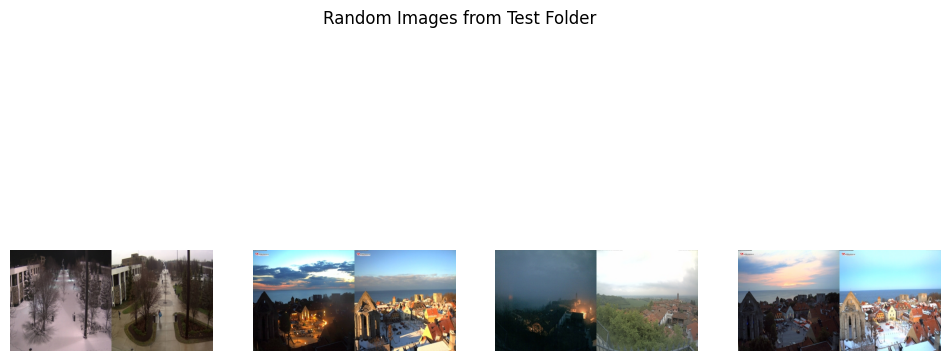

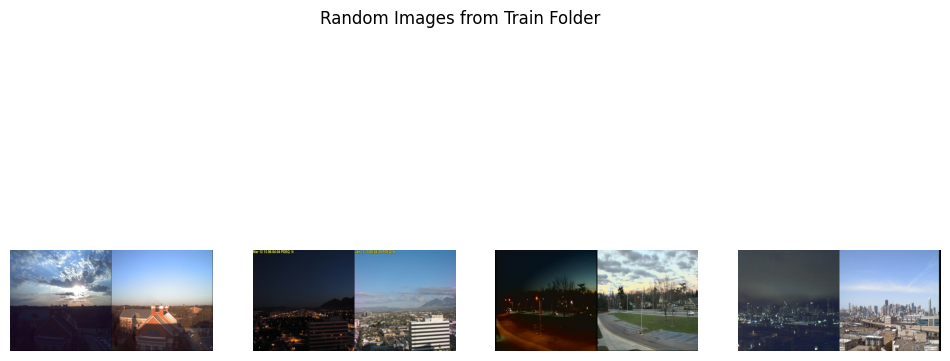

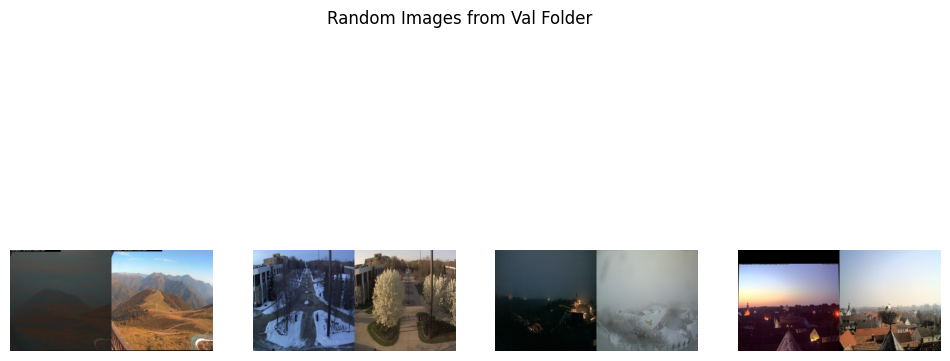

In [8]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define the paths to the train, val, and test folders
test_folder = '/content/pytorch-CycleGAN-and-pix2pix/datasets/night2day/test'
train_folder = '/content/pytorch-CycleGAN-and-pix2pix/datasets/night2day/train'
val_folder = '/content/pytorch-CycleGAN-and-pix2pix/datasets/night2day/val'

# Function to get a list of random images from a folder
def get_random_images(folder, num_images=4):
    all_images = os.listdir(folder)
    random_images = random.sample(all_images, min(num_images, len(all_images)))
    return [os.path.join(folder, image) for image in random_images]

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(12, 6))
    plt.suptitle(title)

    for i, image_path in enumerate(image_paths, 1):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, len(image_paths), i)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

# Get random images from each folder and display them
test_images = get_random_images(test_folder)
train_images = get_random_images(train_folder)
val_images = get_random_images(val_folder)

display_images(test_images, 'Random Images from Test Folder')
display_images(train_images, 'Random Images from Train Folder')
display_images(val_images, 'Random Images from Val Folder')


# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --display_id -1

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

In [ ]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb

# Visualize

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_fake_B.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_A.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_B.png')
plt.imshow(img)